<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_YB/blob/main/HW0410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##12-1. datetime 오브젝트

###datetime 오브젝트로 변환하기 - to_datetime 메서드

시계열 데이터를 문자열로 저장해야 할 때가 있는데, 문자열은 시간 계산을 할 수 없기 떄문에 datetime 오브젝트로 변환해야 함

<문자열을 datetime 오브젝트로 변환하기>

1. ebola 데이터 집합을 불러옴

In [ ]:
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/mydrive')

In [2]:
ebola = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회/데이터/country_timeseries.csv')

2. ebola 데이터프레임을 보면 문자열로 지정된 Date 열이 있는 것을 알 수 있음

In [3]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

3. to_datetime 메서드를 사용하면 Date 열의 자료형을 datetime 오브젝트로 변환할 수 있음

In [4]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

4. format 인자의 사용법

In [6]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'],format = '%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'],format = '%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'],format = '%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [9]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt']=pd.to_datetime(test_df2['order_day'], format = '%d-%m-%y')
print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


###시간 형식 지정자
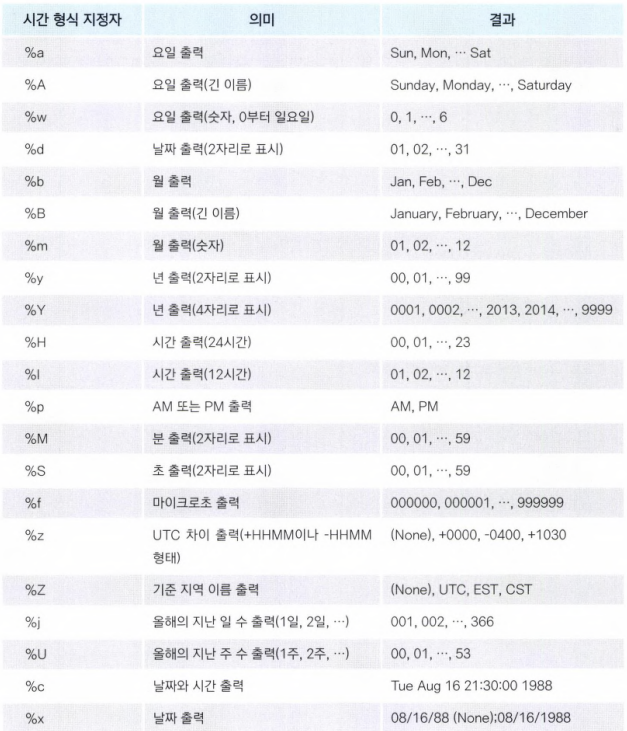

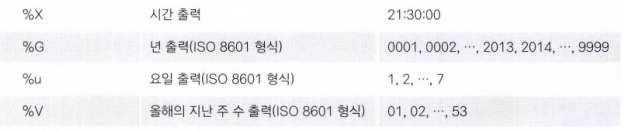

cf) 시계열 데이터를 구분해서 추출하기

In [11]:
from datetime import datetime
now = datetime.now()
print(now)

2023-04-07 06:32:21.182008


In [13]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2023-04-07


In [15]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

06:32:21


In [16]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2023-04-07 06:32:21


###datetime 오브젝트로 변환하기 - read_csv 메서드

datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합을 불러오는 것이 더 간단함

<datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기>

1. read_csv 메서드의 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터 집합 불러오기

In [17]:
ebola1 = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회/데이터/country_timeseries.csv',
                     parse_dates=['Date'])
print(ebola1.info())
#Date 열이 문자열이 아니라 datetime 오브젝트라는 것 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

<datetime 오브젝트에서 날짜 정보 추출하기>

1. 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환하기

In [18]:
date_series = pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


2. datetime 오브젝트의 year, month, day 속성을 이용하여 년, 월, 일 정보 추출하기

In [19]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


###dt 접근자 사용하기

dt 접근자를 사용하면 datetime 속성이나 메서드를 이용하여 시계열 데이터 처리 가능함

[dt 접근자로 시계열 데이터 정리하기]

1. ebola 데이터 집합을 불러온 다음 Date 열을 datetime 오브젝트로 변환하여 새로운 열로 추가하기

In [20]:
ebola = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회/데이터/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

2. dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터를 추출하기

In [21]:
print(ebola[['Date','date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [22]:
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

#특정 데이터를 인덱스로 접근해야 하기 때문에 불편함

2015
1
2


3. dt 접근자로 date_dt 열에 한 번에 접근한 다음 year 속성을 이용하여 연도값 추출. 추출한 연도값은 새로운 열로 추가함

In [23]:
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


4. 과정 3을 응용하여 월, 일 데이터를 한 번에 추출해서 새로운 열로 추가함

In [24]:
ebola['month'],ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


5. ebola 데이터 프레임에 새로 추가한 열의 자료형을 출력

In [25]:
print(ebola.info())

#date_dt 열은 datetime 오브젝트이고 나머지는 정수형임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

##12-2. 사례별 시계열 데이터 계산하기

### 에볼라 최초 발병일 계산하기

1. ebola 데이터 프레임의 마지막 행과 열을 5개씩만 살펴보기

In [26]:
print(ebola.iloc[-5:,:5])

#ebola 데이터프레임은 데이터가 시간 역순임
#시간순으로 데이터를 보기 위해서는 데이터프레임의 마지막부터 살펴봐야 함.

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


2. min 메서드를 사용하여 에볼라의 최초 발병일 찾기

In [27]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


3. Date 열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있음

In [28]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date','Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


###파산한 은행의 개수 계산하기

1. 파산한 은행 데이터 집합 불러오기

In [29]:
banks = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회/데이터/banklist.csv')
print(banks.head())

#closing date, updated date 열의 자료형은 문자열

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


2. read_csv 메서드의 parse_dates 속성을 이용해 문자열로 지정된 두 열을 datetime 오브젝트로 변환하여 불러오기

In [30]:
banks_no_dates = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회/데이터/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [31]:
banks = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회/데이터/banklist.csv', parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


3. dt 접근자와 quarter 속성을 이용하여 은행이 파산한 연도, 분기를 새로운 열로 추가하기

In [32]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter,
                                                   banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

4. groupby 메서드를 사용하여 연도별로 파산한 은행의 개수 구하기

In [33]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


5. banks 데이터프레임을 연도별로 그룹화한 다음 다시 분기별로 그룹화하여 출력하기 -> 각 연도별, 분기별로 파산한 은행의 개수 파악

In [34]:
closing_year_q = banks.groupby(['closing_year','closing_quarter']).size()
print((closing_year_q))

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

6. 과정 5에서 얻은 값으로 그래프 그리기

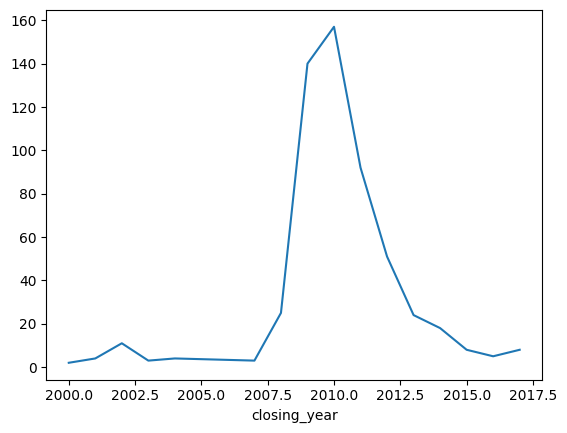

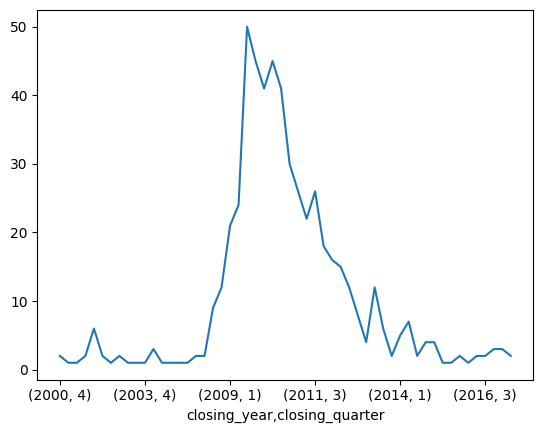

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

###시간 범위 수정하고 데이터 밀어내기 - shift 메서드

[에볼라의 확산 속도 비교하기]

1. ebola 데이터프레임의 Date 열을 인덱스로 지정한 다음 그래프 그리기

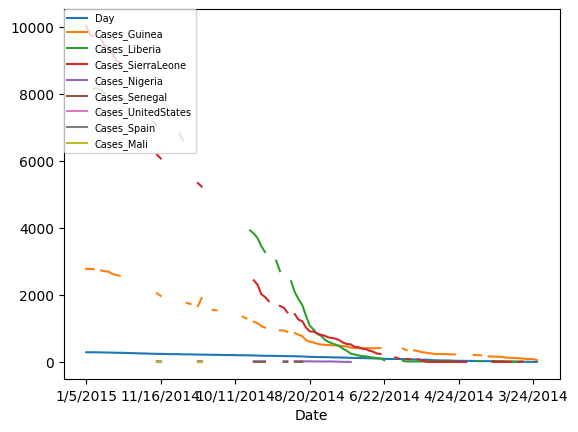

In [41]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:,1:10].plot(ax=ax) #1:로 하면 너무 커서 오류 발생 -> 1:10으로 수정
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

2. 각 나라의 발병일을 가장 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 나라별 에볼라 확산 속도를 제대로 비교 가능함

In [43]:
ebola_sub = ebola[['Day','Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

           Day  Cases_Guinea  Cases_Liberia
Date                                       
4/4/2014    13         143.0           18.0
4/1/2014    10         127.0            8.0
3/31/2014    9         122.0            8.0
3/29/2014    7         112.0            7.0
3/28/2014    6         112.0            3.0
3/27/2014    5         103.0            8.0
3/26/2014    4          86.0            NaN
3/25/2014    3          86.0            NaN
3/24/2014    2          86.0            NaN
3/22/2014    0          49.0            NaN


3. 그래프를 그리기 위한 데이터프레임 준비하기
- Date 열의 자료형을 datetime 오브젝트로 변환하여 ebola 데이터프레임을 다시 생성하기
- 중간에 날짜가 아예 없는 데이터도 포함시키기

In [45]:
ebola = ebola = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회/데이터/country_timeseries.csv',
                            parse_dates=['Date'])
print(ebola.head().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [46]:
print(ebola.tail().iloc[:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


4. 날짜가 아예 없었던 데이터의 인덱스 생성하기
- Date 열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date 열의 최댓값과 최솟값으로 시간 범위를 생성하여 new_idx에 저장

In [47]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

5. 시간 순서를 맞추기 위해 reversed 메서드를 사용하여 인덱스를 반대로 뒤집기

In [48]:
#ebola 데이터 집합에 있는 시간 순서와 반대로 생성되어 있음
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [49]:
new_idx = reversed(new_idx)

6. reindex 메서드를 사용하여 새로 생성한 인덱스를 새로운 인덱스로 지정하기

In [50]:
ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [51]:
print(ebola.tail().iloc[:,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


7. 각 나라의 에볼라 발병일 옮기기

In [52]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [53]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


8. 각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면 에볼라가 가장 처음 발병한 날에서 각 나라의 에볼라 발병일을 뺀 만큼만 옮기면 됨

In [55]:
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [56]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


9. 모든 나라의 에볼라 발병일 옮기기

In [58]:
ebola_dict= {}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

10. DataFrame 메서드를 사용하여 ebola_dict 값을 데이터프레임으로 변환하기

In [60]:
ebola_shift = pd.DataFrame(ebola_dict)

11. 데이터 확인하기

In [63]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

12. 인덱스를 Day 열로 지정하고 그래프에 필요없는 Date, Day 열은 삭제하기

In [64]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'], axis=1)
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

13. 지금까진 만든 데이터프레임으로 그래프 다시 그리기

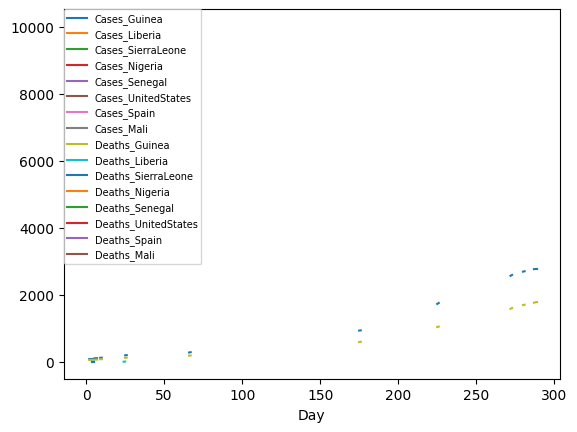

In [65]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad = 0.)
plt.show()